In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/mldata.csv")

In [3]:
data

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,yes,no,shell programming,hacking,poor,poor,Software Engineering,testing,Testing and Maintainance Services,yes,Trilogy,Management,smart worker,no,yes,Web Developer
6897,6,5,1,8,no,no,machine learning,hacking,excellent,excellent,programming,testing,Testing and Maintainance Services,no,Science,Management,hard worker,no,no,Web Developer
6898,5,1,6,7,yes,no,distro making,data science,poor,poor,IOT,system developer,Cloud Services,yes,Self help,Technical,hard worker,yes,no,Web Developer
6899,1,6,4,6,no,no,app development,game development,poor,excellent,data engineering,developer,SAaS services,no,Drama,Technical,smart worker,no,yes,Web Developer


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [5]:
data.dropna(inplace=True)

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\n\nList of Categorical features: \n" , categorical_cols )



List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


In [7]:
cols = data[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"]]

for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    data = data.replace(cleanup_nums)

print("\n\nList of Categorical features: \n" ,  data.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [8]:
mycol = data[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    data = data.replace(cleanup_nums)

category_cols = data[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 
                    'Interested Type of Books','Suggested Job Role']]
for i in category_cols:
    data[i] = data[i].astype('category')
    data[i + "_code"] = data[i].cat.codes

print("\n\nList of Categorical features: \n" , data.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Management or Technical', 'hard/smart worker']


In [9]:
print(data['Management or Technical'].unique())
print(data['hard/smart worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [10]:
data = pd.get_dummies(data, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"])
data

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,Suggested Job Role_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,6,9,5,0,28,0,1,0,0,1
1,7,6,4,3,0,1,shell programming,testing,2,1,...,6,2,4,1,3,0,0,1,1,0
2,2,3,9,1,0,1,information security,testing,2,0,...,6,5,0,9,29,0,0,1,0,1
3,2,6,3,5,0,1,r programming,database security,2,0,...,2,7,5,7,13,0,1,0,0,1
4,2,0,3,4,1,0,distro making,game development,2,1,...,3,3,4,0,14,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,1,0,shell programming,hacking,0,0,...,4,3,5,7,30,11,1,0,0,1
6897,6,5,1,8,0,0,machine learning,hacking,2,2,...,4,9,5,7,25,11,1,0,1,0
6898,5,1,6,7,1,0,distro making,data science,0,0,...,1,1,4,1,27,11,0,1,1,0
6899,1,6,4,6,0,0,app development,game development,0,2,...,3,5,2,4,10,11,0,1,0,1


In [11]:
from sklearn.model_selection import train_test_split

X=data.drop(["Suggested Job Role"], axis=1)
y=data["Suggested Job Role"]

In [12]:
X

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,Suggested Job Role_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,6,9,5,0,28,0,1,0,0,1
1,7,6,4,3,0,1,shell programming,testing,2,1,...,6,2,4,1,3,0,0,1,1,0
2,2,3,9,1,0,1,information security,testing,2,0,...,6,5,0,9,29,0,0,1,0,1
3,2,6,3,5,0,1,r programming,database security,2,0,...,2,7,5,7,13,0,1,0,0,1
4,2,0,3,4,1,0,distro making,game development,2,1,...,3,3,4,0,14,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,1,0,shell programming,hacking,0,0,...,4,3,5,7,30,11,1,0,0,1
6897,6,5,1,8,0,0,machine learning,hacking,2,2,...,4,9,5,7,25,11,1,0,1,0
6898,5,1,6,7,1,0,distro making,data science,0,0,...,1,1,4,1,27,11,0,1,1,0
6899,1,6,4,6,0,0,app development,game development,0,2,...,3,5,2,4,10,11,0,1,0,1


In [13]:
X.drop(['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 
                    'Interested Type of Books'], axis=1 )

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,reading and writing skills,memory capability score,Taken inputs from seniors or elders,worked in teams ever?,...,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,Suggested Job Role_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,0,0,0,1,...,6,9,5,0,28,0,1,0,0,1
1,7,6,4,3,0,1,2,1,1,0,...,6,2,4,1,3,0,0,1,1,0
2,2,3,9,1,0,1,2,0,1,0,...,6,5,0,9,29,0,0,1,0,1
3,2,6,3,5,0,1,2,0,1,1,...,2,7,5,7,13,0,1,0,0,1
4,2,0,3,4,1,0,2,1,0,1,...,3,3,4,0,14,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,1,0,0,0,1,0,...,4,3,5,7,30,11,1,0,0,1
6897,6,5,1,8,0,0,2,2,0,0,...,4,9,5,7,25,11,1,0,1,0
6898,5,1,6,7,1,0,0,0,1,1,...,1,1,4,1,27,11,0,1,1,0
6899,1,6,4,6,0,0,0,2,0,0,...,3,5,2,4,10,11,0,1,0,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
train_data = X_train.join(y_train)

In [16]:
train_data

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,Suggested Job Role_code,A_Management,A_Technical,B_hard worker,B_smart worker,Suggested Job Role
6821,9,1,6,7,1,0,full stack,system designing,1,2,...,5,5,8,0,11,1,0,0,1,Web Developer
129,7,1,6,5,1,0,shell programming,database security,1,2,...,0,3,7,20,0,0,1,1,0,Applications Developer
3599,9,1,3,1,0,1,python,database security,2,2,...,8,4,1,13,6,0,1,0,1,Software Engineer
2359,6,5,6,7,1,0,distro making,data science,1,0,...,9,5,9,16,4,1,0,1,0,Network Security Engineer
6795,4,5,3,3,1,0,full stack,database security,1,2,...,6,1,5,4,11,1,0,1,0,Web Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,7,0,6,8,0,0,full stack,testing,0,0,...,6,3,2,25,5,0,1,0,1,Software Developer
4283,9,2,1,5,0,0,hadoop,database security,1,1,...,6,3,0,12,7,1,0,1,0,Software Quality Assurance (QA) / Testing
6699,5,6,8,4,1,0,shell programming,database security,0,1,...,3,3,6,4,11,1,0,0,1,Web Developer
6455,1,6,6,3,0,1,hadoop,hacking,1,1,...,1,5,5,25,11,1,0,0,1,Web Developer


C:\Users\user\AppData\Local\Temp\ipykernel_1292\3346828142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

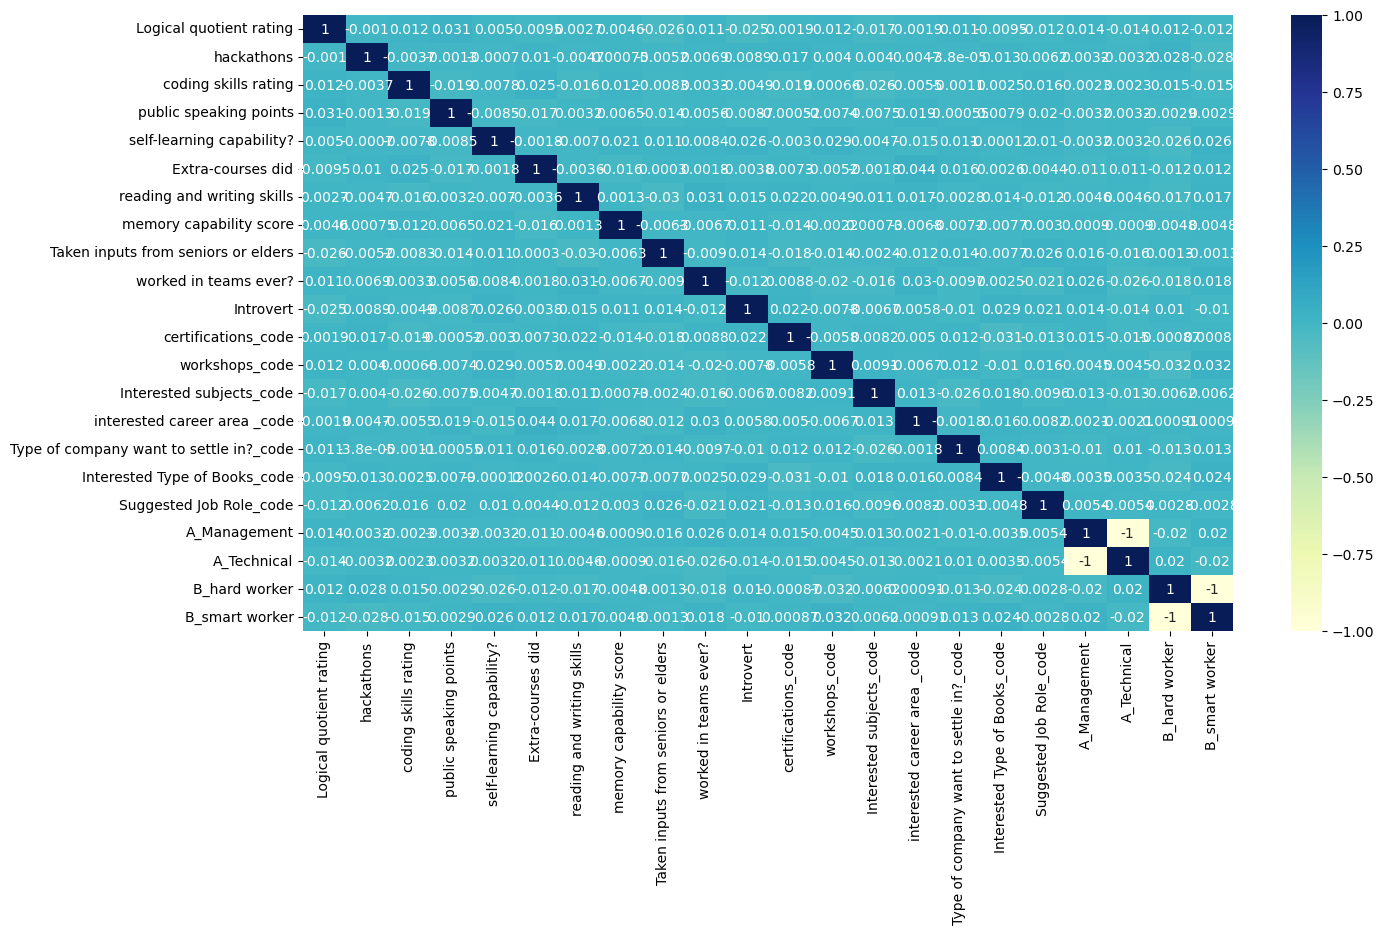

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")